In [1]:
import os
import re

import numpy as np
import mlflow

print(os.getcwd())
if os.getcwd().endswith("/multiobjective_opt/notebooks"):
    os.chdir("..")

/home/xxam_xam/my_files/multiobjective_opt/notebooks


In [2]:
EXP_NAME = "experiments_cycle"

experiment = mlflow.get_experiment_by_name(EXP_NAME)
runs = mlflow.search_runs(experiment.experiment_id)

In [3]:
runs

run_id       experiment_id    status  \
0   5c44931c301841c698bb16236f61b4fa  574442887333618884   RUNNING   
1   c6a45fbbcd4b4eb7a93924181408b2c1  574442887333618884   RUNNING   
2   ace78411d68b48e9ae1f47dfb6dcf696  574442887333618884   RUNNING   
3   b48364af1fe743b3b19cd92bea9f3cbc  574442887333618884  FINISHED   
4   2269899d619940e6955a19c93137b374  574442887333618884  FINISHED   
5   56876da161f6464ba78ef560855dcbaf  574442887333618884  FINISHED   
6   c57d360e84b44ec4aa3cd4ee7011b94b  574442887333618884  FINISHED   
7   96a69c4bd6ed4f2aba8af7d1a3fc0d59  574442887333618884  FINISHED   
8   0d9cc6774499499188302d68e427b5c1  574442887333618884   RUNNING   
9   49c9d091f8e54deb9a4c277fb1760e2c  574442887333618884   RUNNING   
10  042f69333c8a41d3806ae5979ef1bc0e  574442887333618884  FINISHED   
11  2bdbae49ac0c436981bc1a55a58d9bff  574442887333618884  FINISHED   
12  3bf4edb424eb46b9a9d7f1b7a8ef8915  574442887333618884  FINISHED   
13  bb2f2efde5144c2a967bff9f9b1208c8  574442887333618884  FINISHED   
14  bce03aa405b045398de66543921b5923  574442887333618884  FINISHED   
15  ed883f02f56c42b78df9d3c6832c91ce  574442887333618884  FINISHED   
16  57eed2d946b94c2f9bee3a6afae884e2  574442887333618884  FINISHED   
17  af49089cae7b46339ed439be070d38b2  574442887333618884  FINISHED   
18  58becea4bf634164a8d2e4ea50bc1e01  574442887333618884  FINISHED   
19  50d7d9e3633a4787bc60fd25937ccb3b  574442887333618884  FINISHED   
20  5d0397014205465c992106ec7b9bf340  574442887333618884  FINISHED   
21  4d176eccdeb649999d29e9574e155ddc  574442887333618884  FINISHED   
22  c8b9aa08c0e7451db73382550a87f0a2  574442887333618884  FINISHED   
23  56f00da04acd48cc9922ede38c0012d5  574442887333618884  FINISHED   
24  a821c526ee104eddbda0ff3c8341749a  574442887333618884  FINISHED   
25  f9810acdfd4a4effb1ef19cf52e96175  574442887333618884  FINISHED   

                                         artifact_uri  \
0   file:///home/xxam_xam/my_files/multiobjective_...   
1   file:///home/xxam_xam/my_files/multiobjective_...   
2   file:///home/xxam_xam/my_files/multiobjective_...   
3   file:///home/xxam_xam/my_files/multiobjective_...   
4   file:///home/xxam_xam/my_files/multiobjective_...   
5   file:///home/xxam_xam/my_files/multiobjective_...   
6   file:///home/xxam_xam/my_files/multiobjective_...   
7   file:///home/xxam_xam/my_files/multiobjective_...   
8   file:///home/xxam_xam/my_files/multiobjective_...   
9   file:///home/xxam_xam/my_files/multiobjective_...   
10  file:///home/xxam_xam/my_files/multiobjective_...   
11  file:///home/xxam_xam/my_files/multiobjective_...   
12  file:///home/xxam_xam/my_files/multiobjective_...   
13  file:///home/xxam_xam/my_files/multiobjective_...   
14  file:///home/xxam_xam/my_files/multiobjective_...   
15  file:///home/xxam_xam/my_files/multiobjective_...   
16  file:///home/xxam_xam/my_files/multiobjective_...   
17  file:///home/xxam_xam/my_files/multiobjective_...   
18  file:///home/xxam_xam/my_files/multiobjective_...   
19  file:///home/xxam_xam/my_files/multiobjective_...   
20  file:///home/xxam_xam/my_files/multiobjective_...   
21  file:///home/xxam_xam/my_files/multiobjective_...   
22  file:///home/xxam_xam/my_files/multiobjective_...   
23  file:///home/xxam_xam/my_files/multiobjective_...   
24  file:///home/xxam_xam/my_files/multiobjective_...   
25  file:///home/xxam_xam/my_files/multiobjective_...   

                         start_time                         end_time  \
0  2025-04-22 17:05:57.917000+00:00                              NaT   
1  2025-04-22 16:59:11.835000+00:00                              NaT   
2  2025-04-22 16:58:43.743000+00:00                              NaT   
3  2025-04-22 16:44:41.493000+00:00 2025-04-22 17:00:34.024000+00:00   
4  2025-04-22 16:40:37.630000+00:00 2025-04-22 16:59:02.907000+00:00   
5  2025-04-22 16:37:21.929000+00:00 2025-04-22 16:58:35.991000+00:00   
6  2025-04-22 16:29:00.153000+00:00 2025-04-22 16:44:32.525000+00:00   
7  2025-04-22 16:22:52.

In [4]:
def exp_selector(name):
    # return re.match(pattern, name)
    return name.startswith("mab_train;Successive")

selected_experiments_pos = runs["tags.mlflow.runName"].apply(exp_selector)

exp_ids = runs[selected_experiments_pos & (runs['status'] == "FINISHED")]["run_id"].values
exp_ids
# artifact_path = mlflow.artifacts.download_artifacts(run_id=run_id, artifact_path="run_results_table.json")

array(['56876da161f6464ba78ef560855dcbaf',
       '042f69333c8a41d3806ae5979ef1bc0e'], dtype=object)

In [5]:
client = mlflow.MlflowClient()

run_id = exp_ids[0]
run = client.get_run(run_id)

In [6]:
metric_names = list(run.data.metrics.keys())
metric_names

['pull_rew.confidence_bound',
 'pull_rew.value',
 'pull_rew.eval_rez.duration',
 'pulled_arm',
 'test_rew.loss',
 'pull_rew.eval_rez.loss',
 'test_rew.duration',
 'pull_rew.eval_rez.accuracy',
 'test_rew.accuracy']

In [7]:
alg_names = run.data.params["alg_names"]
alg_names

"['ShallowMLP', 'ResNet18', 'DeepMLPNorm', 'VGGLike', 'DeepMLP']"

In [8]:
def parse_values(f, n_arms, arm_key, duration_key):
    def get_placeholder_for_val():
        return np.zeros((len(f) - n_arms,n_arms))
    
    duration = np.zeros(n_arms, float)
    key_res = {key: get_placeholder_for_val() for key in f[0].keys()}
    
    for i, elem in enumerate(f[:n_arms]):
        # инициализируем значения
        arm = elem[arm_key]
        duration[arm] = elem[duration_key] - (f[i-1][duration_key] if i > 0 else 0)
        for k, v in elem.items():
            key_res[k][0][arm] = v
    
    # заполнение
    for i, elem in enumerate(f[n_arms:-1], 1):
        if len(elem) == 0:
            continue
        arm = elem[arm_key]
        duration[arm] += elem[duration_key] - f[ i + n_arms - 2][duration_key]

        for k, v in elem.items():
            key_res[k][i] = key_res[k][i - 1]
            key_res[k][i][arm] = v

    return duration, key_res

In [9]:
T = 355
N_ARMS = 5
arm_key = "pulled_arm"
duration_key = 'pull_rew.eval_rez.duration'


client = mlflow.MlflowClient()
keys = [
        'pulled_arm',

        'pull_rew.confidence_bound',
        'pull_rew.value',

        'pull_rew.eval_rez.loss',
        'pull_rew.eval_rez.duration',
        'pull_rew.eval_rez.accuracy',

        'test_rew.loss',
        'test_rew.duration',
        'test_rew.accuracy'
    ]

results = []
for run_id in exp_ids:
    # process for one run
    # try:
        run_res = [dict() for _ in range(T)]
        for key in keys:
                metric_h = client.get_metric_history(run_id, key=key)
                
                for i, elem in enumerate(metric_h):
                    run_res[i][key] = int(elem.value) if key == "pulled_arm" else elem.value
            
        print(run_res[2]["pulled_arm"])
        if len(run_res[0]) < 1:
               continue
               
        parsed_run = parse_values(run_res, N_ARMS, arm_key, duration_key)
        results.append(parsed_run)
    # except IndexError as e:


4
4


In [10]:
def get_loss_hist(key = "loss"):
    run_loss_hist = [r[1][key].T for r in results]
    return run_loss_hist


In [11]:
from multiobjective_opt.utils.utils import LINESTYLES
from multiobjective_opt.utils.utils import get_fig_set_style
LINESTYLES = [
    ("densely dashed", (0, (3, 1))),
    ("d", "solid"),
    ("d", "dotted"),
    ("d", "dashdot"),
    ("dashdotted", (0, (3, 1, 3, ))),
    ("densely dashed", (0, (5, 1))),
    ("densely dashdotdotted", (0, (3, 1, 1, 1, 1, 1))),
    ("long dash with offset", (1, (1, 0))),
    ("dashed", (0, (5, 5))),
    ("d", "dashed"),
    ("loosely dashdotdotted", (0, (3, 10, 1, 10, 1, 10))),
    ("densely dashdotted", (0, (3, 1, 1, 1))),
    ("dashdotdotted", (0, (3, 5, 1, 5, 1, 5))),
    ("densely dotted", (0, (1, 1))),
    ("long dash with offset", (5, (10, 3))),
    ("loosely dashdotted", (0, (3, 10, 1, 10))),
    ("densely dashdotdotted", (0, (3, 1, 1, 1, 1, 1))),
    ("loosely dashed", (0, (5, 10))),
    ("dashdotdotted", (0, (3, 5, 1, 5, 1, 5))),
    ("loosely dashdotdotted", (0, (3, 10, 1, 10, 1, 10))),
]

import matplotlib.pyplot as plt

import numpy as np

# from multiobjective_opt.utils import LINESTYLES, get_fig_set_style
def plot_vals(ax, run_hist, ylabel, ylim):
    losses = np.stack(run_hist)
    mean_loss = losses.mean(0)
    low_loss = np.quantile(losses, 0.1, 0)
    high_loss = np.quantile(losses, 0.9, 0)


    colors = ["r", "g", "black", "navy", "brown", "blue", "purple", 'darkgreen',]
    markers = ["<", "o", "D", ">", 's']
    nums = [19, 18, 25, 20, 22]
    # model_names = [elem[0] for elem in list(tab.values())[1]]
    print("HARDCODED model names order")
    model_names = ['ShallowMLP', 'ResNet18', 'DeepMLPNorm', 'VGGLike', 'DeepMLP']
    # model_names = ["Linear", "MLP", "Conv2Layer", "Conv3Layer", "ConvDropout", "ConvBatchNorm", "ResNet18"]
    for i, (loss, low, high, color, m_name, ls, m, n) in enumerate(zip(mean_loss, low_loss, high_loss, colors, model_names, LINESTYLES, markers, nums)):
        # plt.fill_between(x, loss - std,loss + std , color=color, alpha=0.1,)
        if m_name == "VGGLike":
             m_name = "VGG"
        if "Conv" in m_name:
             continue
        ax.plot(loss, label = m_name, color = color, linestyle=ls[1], marker = m, 
                            markersize = 10, 
                            markeredgewidth=2, 
                            markerfacecolor='white',
                            markeredgecolor='black',
                            markevery = n)
        print(m_name, ls[0])
        x = np.arange(len(loss))
        # if m_name in ["ResNet18", "ConvBatchNorm"]:
        ax.fill_between(x, low, high, color=color, alpha=0.1,)

    ax.set_ylim(ylim)
    ax.set_ylabel(ylabel)
    ax.set_xlabel(r"$\#$ iterations")
    ax.grid()
    # ax.legend()


HARDCODED model names order
ShallowMLP densely dashed
ResNet18 d
DeepMLPNorm d
VGG d
DeepMLP dashdotted
HARDCODED model names order
ShallowMLP densely dashed
ResNet18 d
DeepMLPNorm d
VGG d
DeepMLP dashdotted
['ShallowMLP', 'ResNet18', 'DeepMLPNorm', 'VGG', 'DeepMLP']
HARDCODED model names order
ShallowMLP densely dashed
ResNet18 d
DeepMLPNorm d
VGG d
DeepMLP dashdotted
HARDCODED model names order
ShallowMLP densely dashed
ResNet18 d
DeepMLPNorm d
VGG d
DeepMLP dashdotted
['ShallowMLP', 'ResNet18', 'DeepMLPNorm', 'VGG', 'DeepMLP']


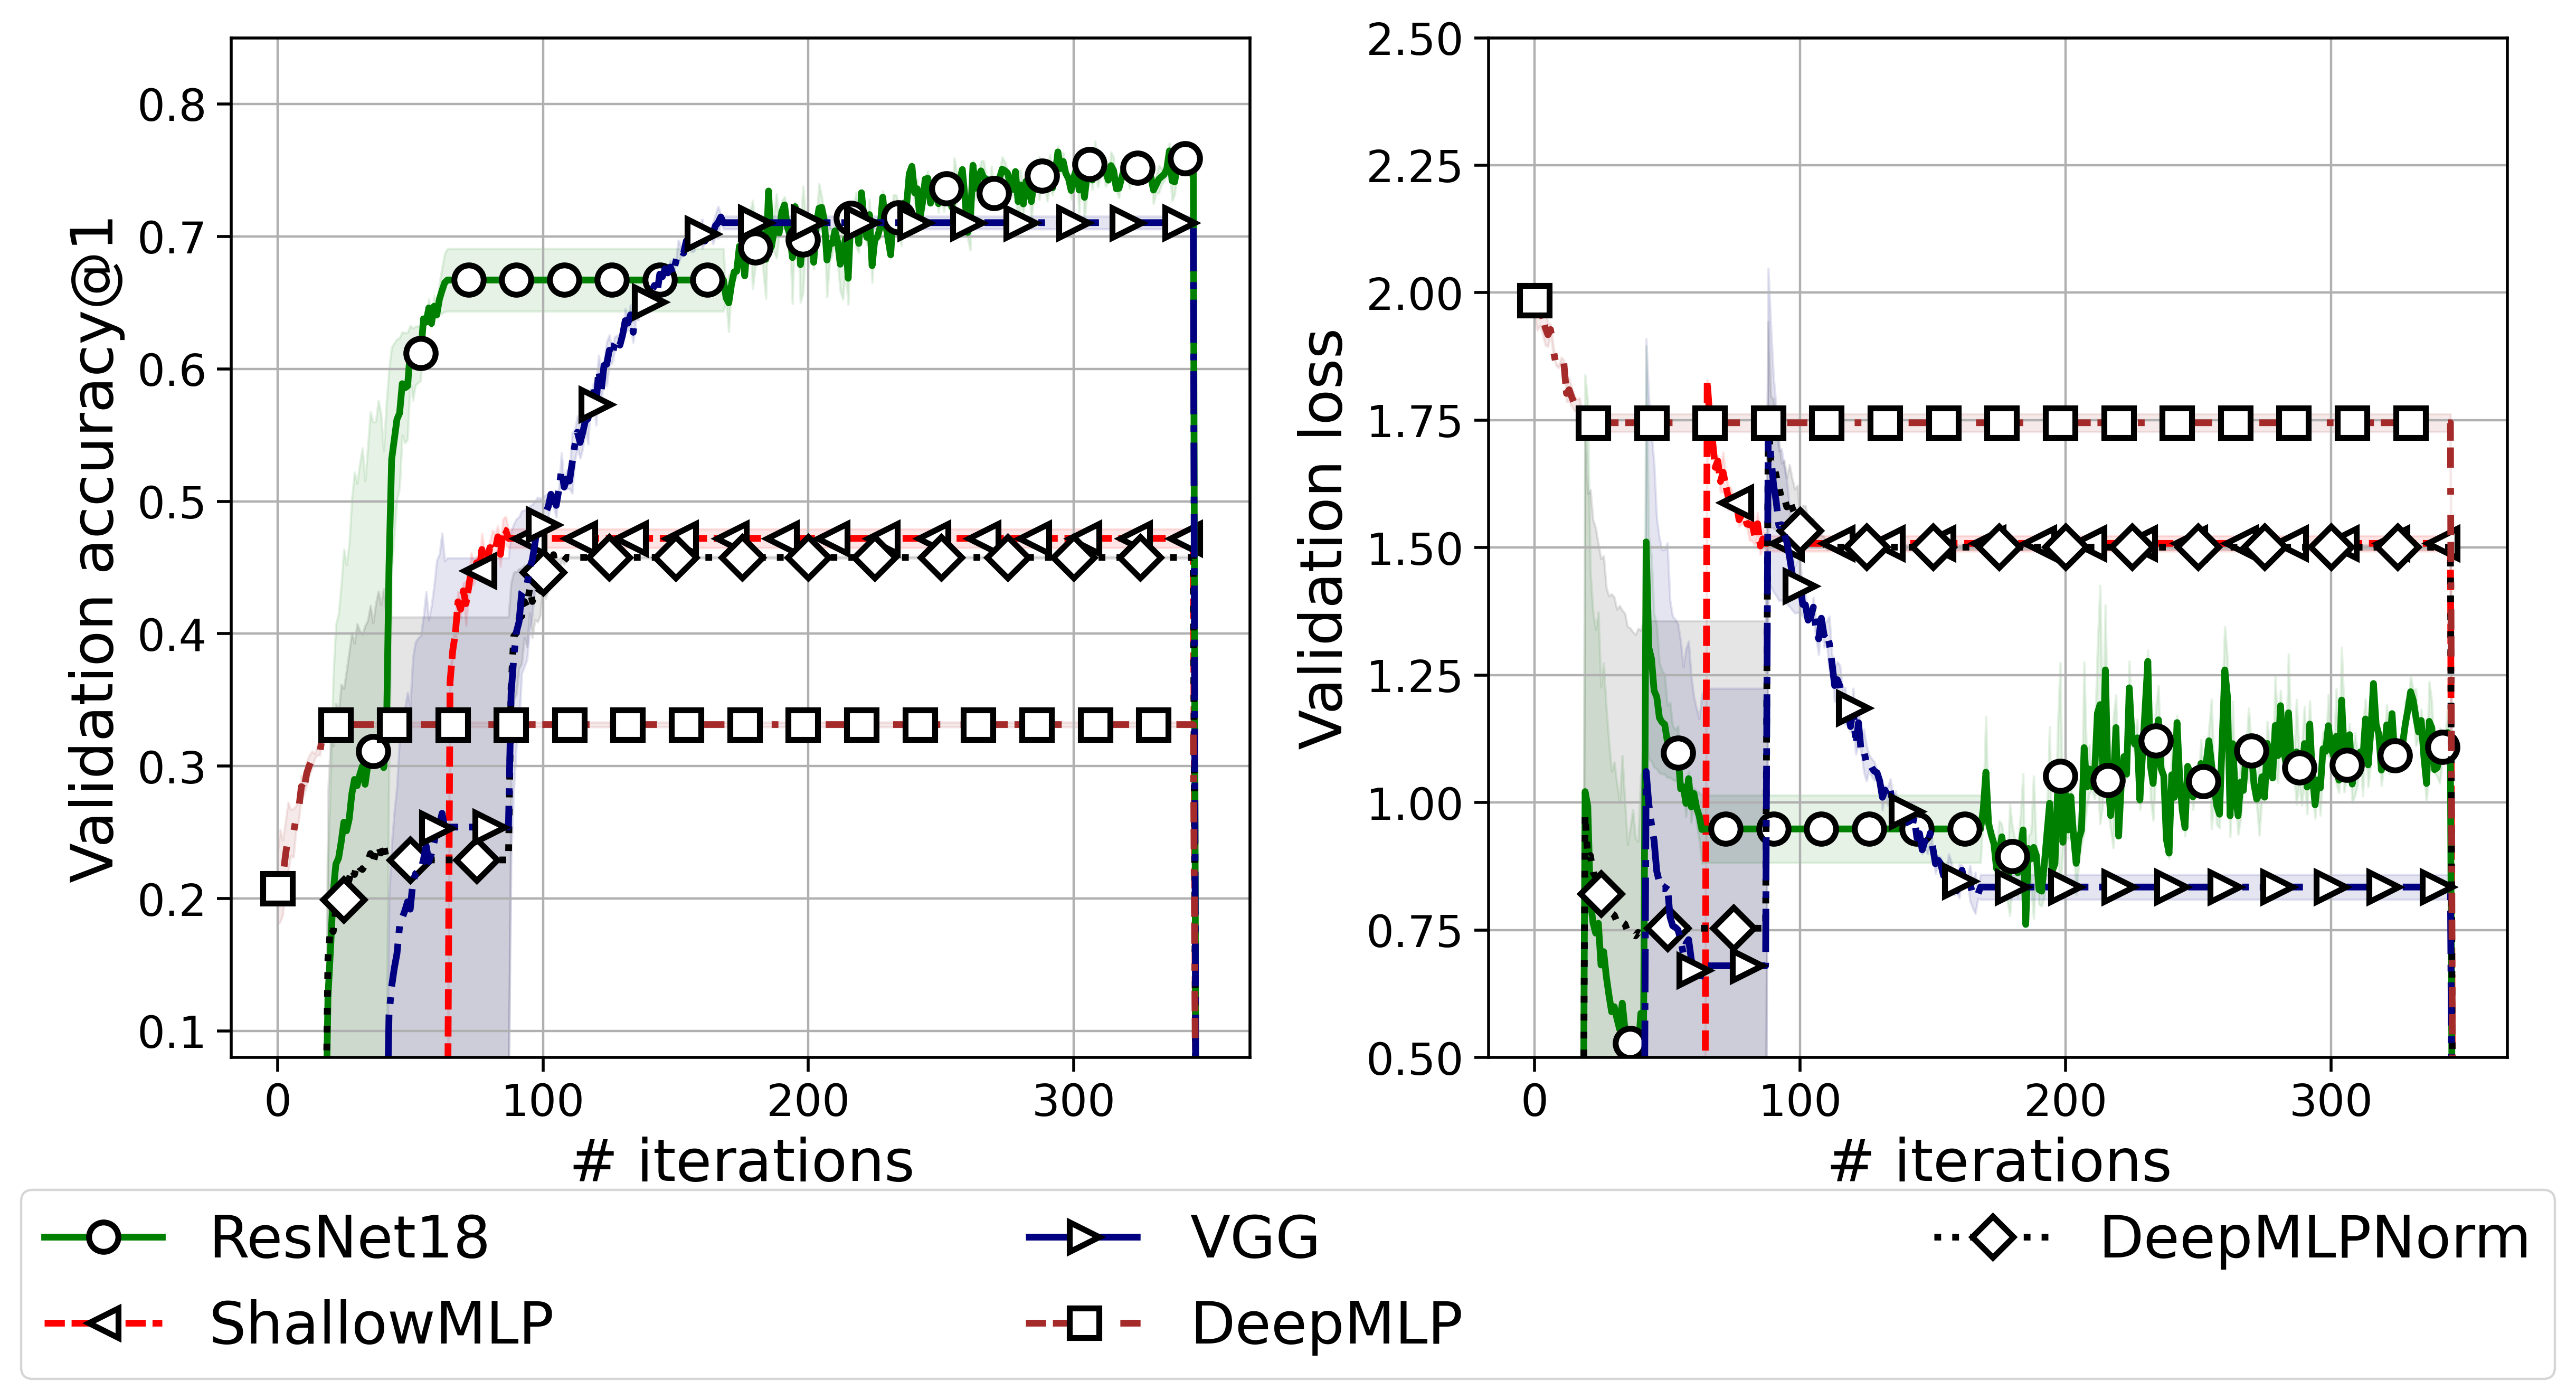

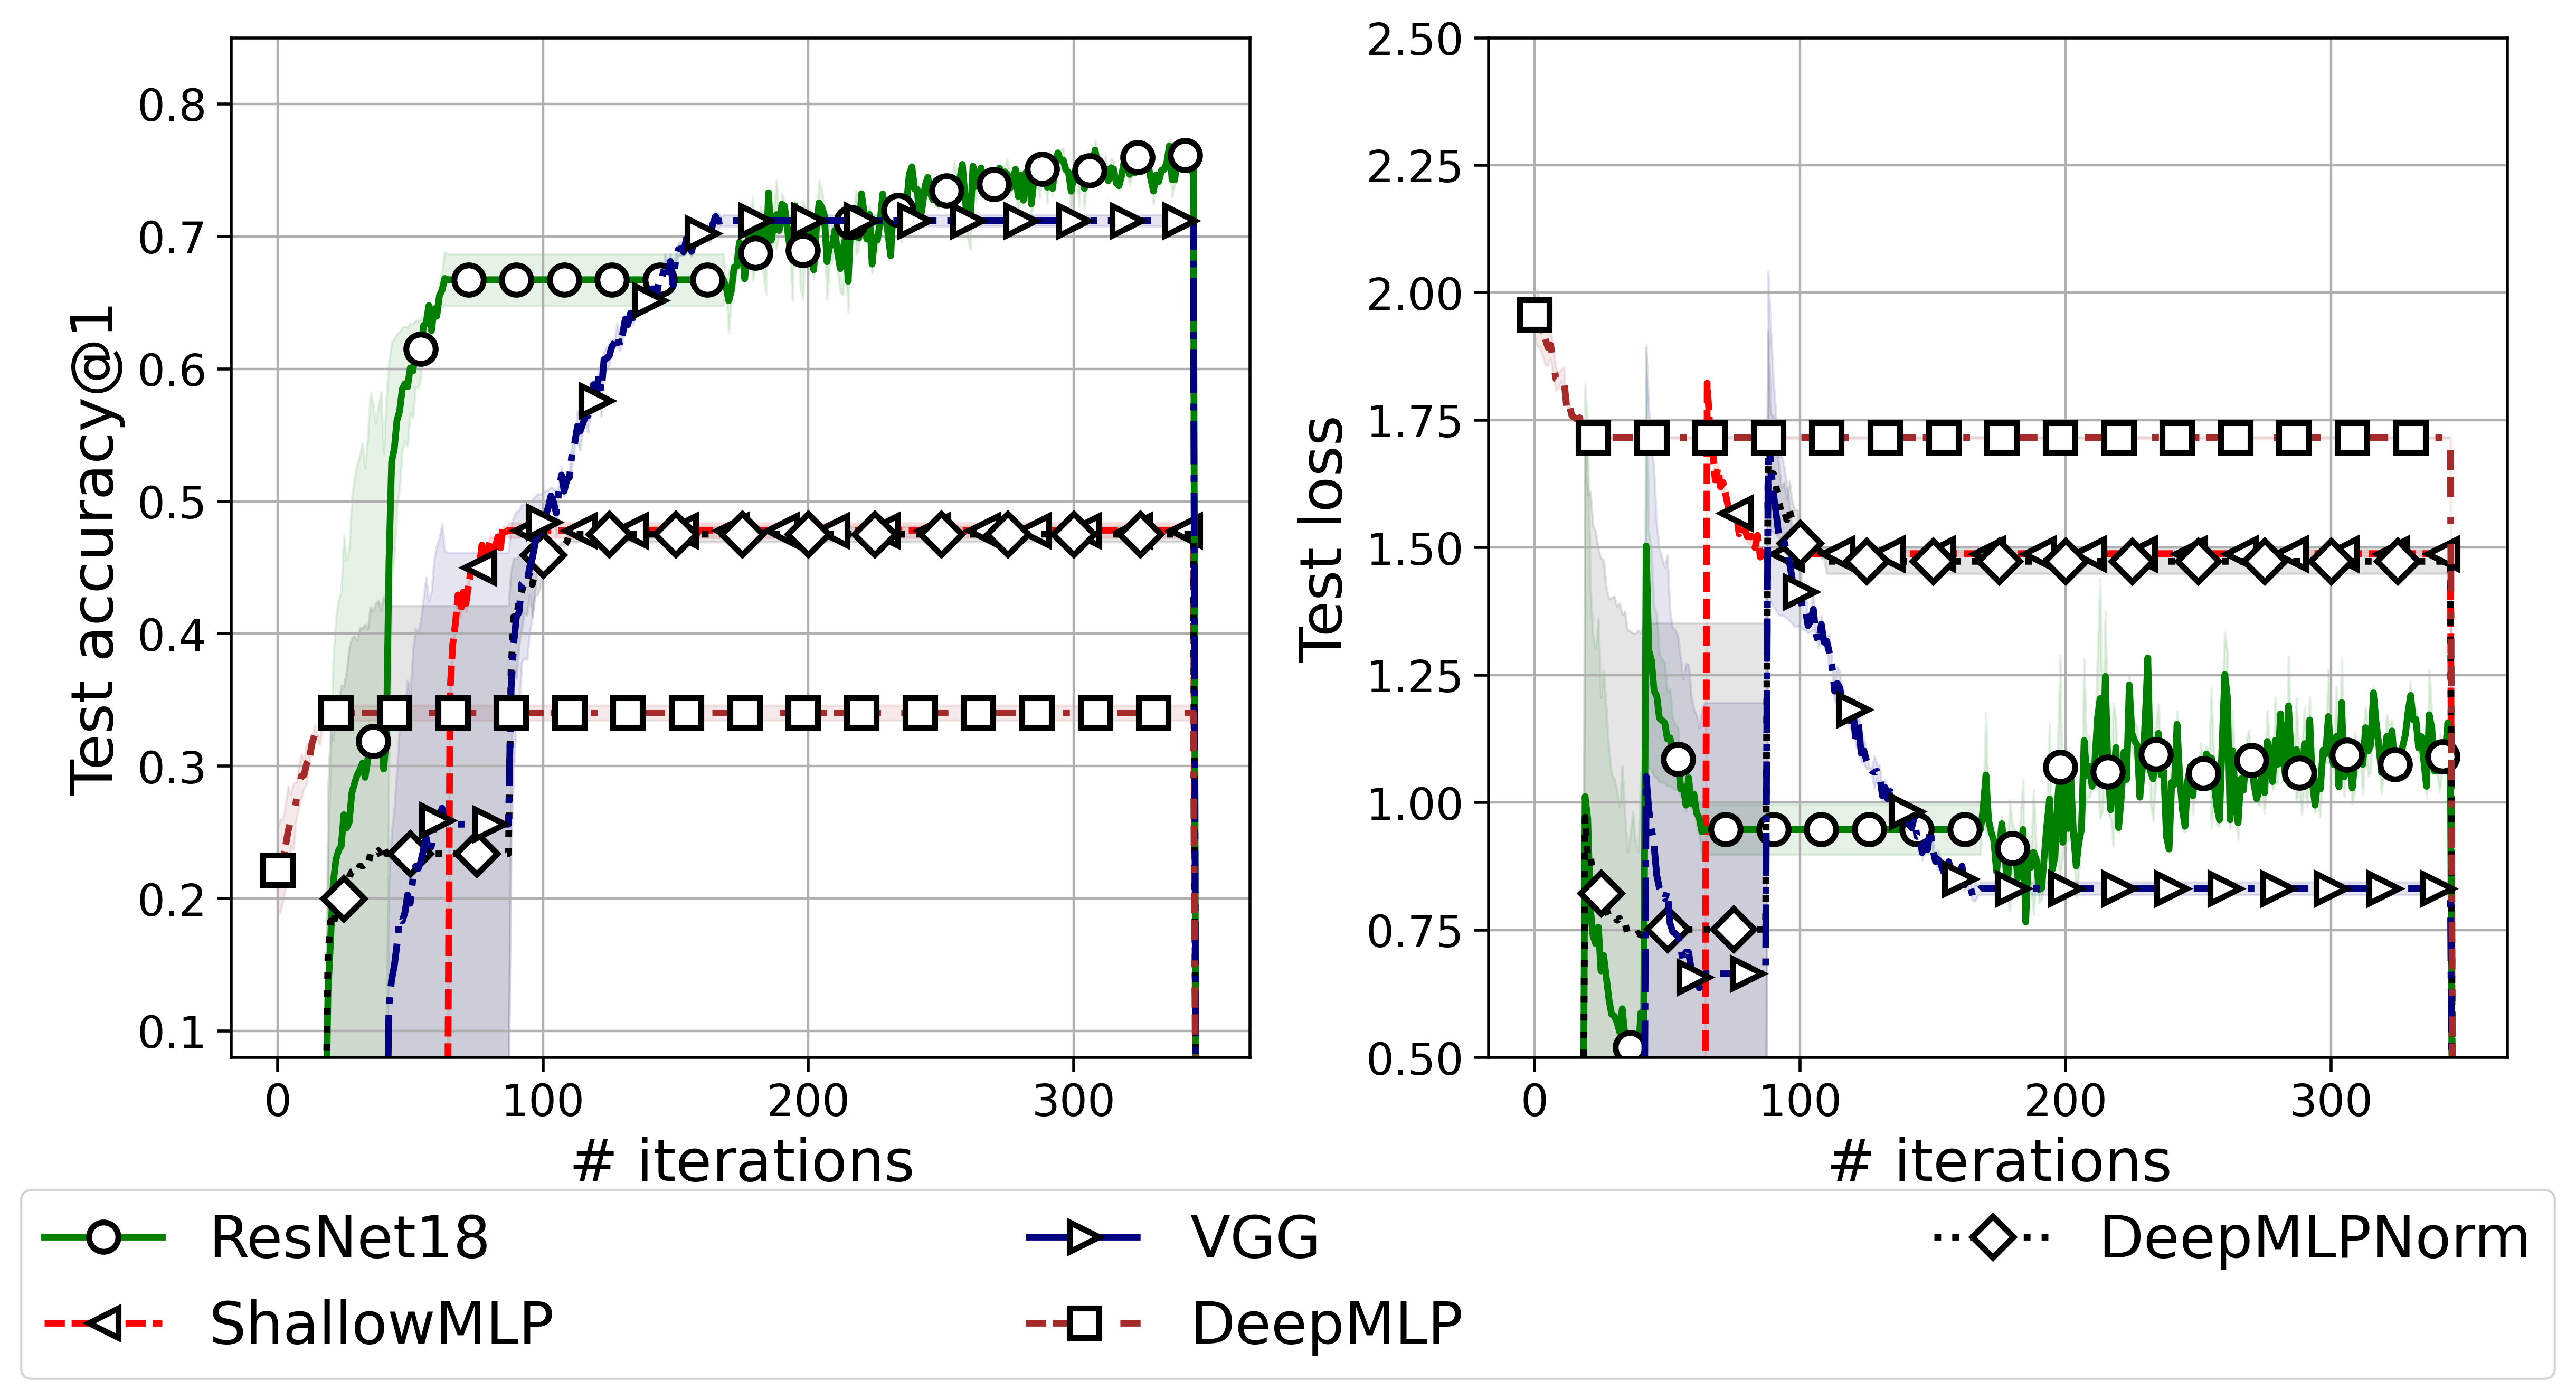

In [12]:

fig, ax, _ = get_fig_set_style(7, shape=(1,2), figsize=(12,6))
ax[1].grid()
plot_vals(ax[0], get_loss_hist("pull_rew.eval_rez.accuracy"), "Validation accuracy@1", (0.08, 0.85))
plot_vals(ax[1], get_loss_hist("pull_rew.eval_rez.loss"), " Validation loss", (0.5, 2.5))
h, legend_ = ax[0].get_legend_handles_labels()

pos = [1, 0, 3, 4, 2]
print(legend_)
legend_, h = [legend_[p] for p in pos], [h[p] for p in pos]
fig.legend(
    h,
    legend_,
    ncol=3,
    bbox_to_anchor=(0.0, -0.06, 1, 0.10),
    loc="outside upper left",
    mode="expand",
    borderaxespad=0,
)


fig.tight_layout()
# fig = fig.subplots_adjust(bottom=0.1)
figs = {"both": fig}

fig, ax, _ = get_fig_set_style(7, shape=(1,2), figsize=(12,6))
ax[1].grid()
plot_vals(ax[0], get_loss_hist('test_rew.accuracy',), "Test accuracy@1", (0.08, 0.85))
plot_vals(ax[1], get_loss_hist('test_rew.loss',), " Test loss", (0.5, 2.5))
h, legend_ = ax[0].get_legend_handles_labels()

pos = [1, 0, 3, 4, 2]
print(legend_)
legend_, h = [legend_[p] for p in pos], [h[p] for p in pos]
fig.legend(
    h,
    legend_,
    ncol=3,
    bbox_to_anchor=(0.0, -0.06, 1, 0.10),
    loc="outside upper left",
    mode="expand",
    borderaxespad=0,
)

fig.tight_layout()
# fig = fig.subplots_adjust(bottom=0.1)
figs = {"test_both": fig}
# ax.grid()


# figs = {}
# figs["acc"] = plot_vals(get_loss_hist("accuracy"), "Accuracy", (0.2, 1.))
# figs["loss"] = plot_vals(get_loss_hist("loss"), "Loss", (0.5, 2.1))

In [13]:
raise ValueError()

ValueError: 

HARDCODED model names order
ShallowMLP densely dashed
ResNet18 d
DeepMLPNorm d
VGG d
DeepMLP dashdotted
HARDCODED model names order
ShallowMLP densely dashed
ResNet18 d
DeepMLPNorm d
VGG d
DeepMLP dashdotted
['ShallowMLP', 'ResNet18', 'DeepMLPNorm', 'VGG', 'DeepMLP']
HARDCODED model names order
ShallowMLP densely dashed
ResNet18 d
DeepMLPNorm d
VGG d
DeepMLP dashdotted
HARDCODED model names order
ShallowMLP densely dashed
ResNet18 d
DeepMLPNorm d
VGG d
DeepMLP dashdotted
['ShallowMLP', 'ResNet18', 'DeepMLPNorm', 'VGG', 'DeepMLP']


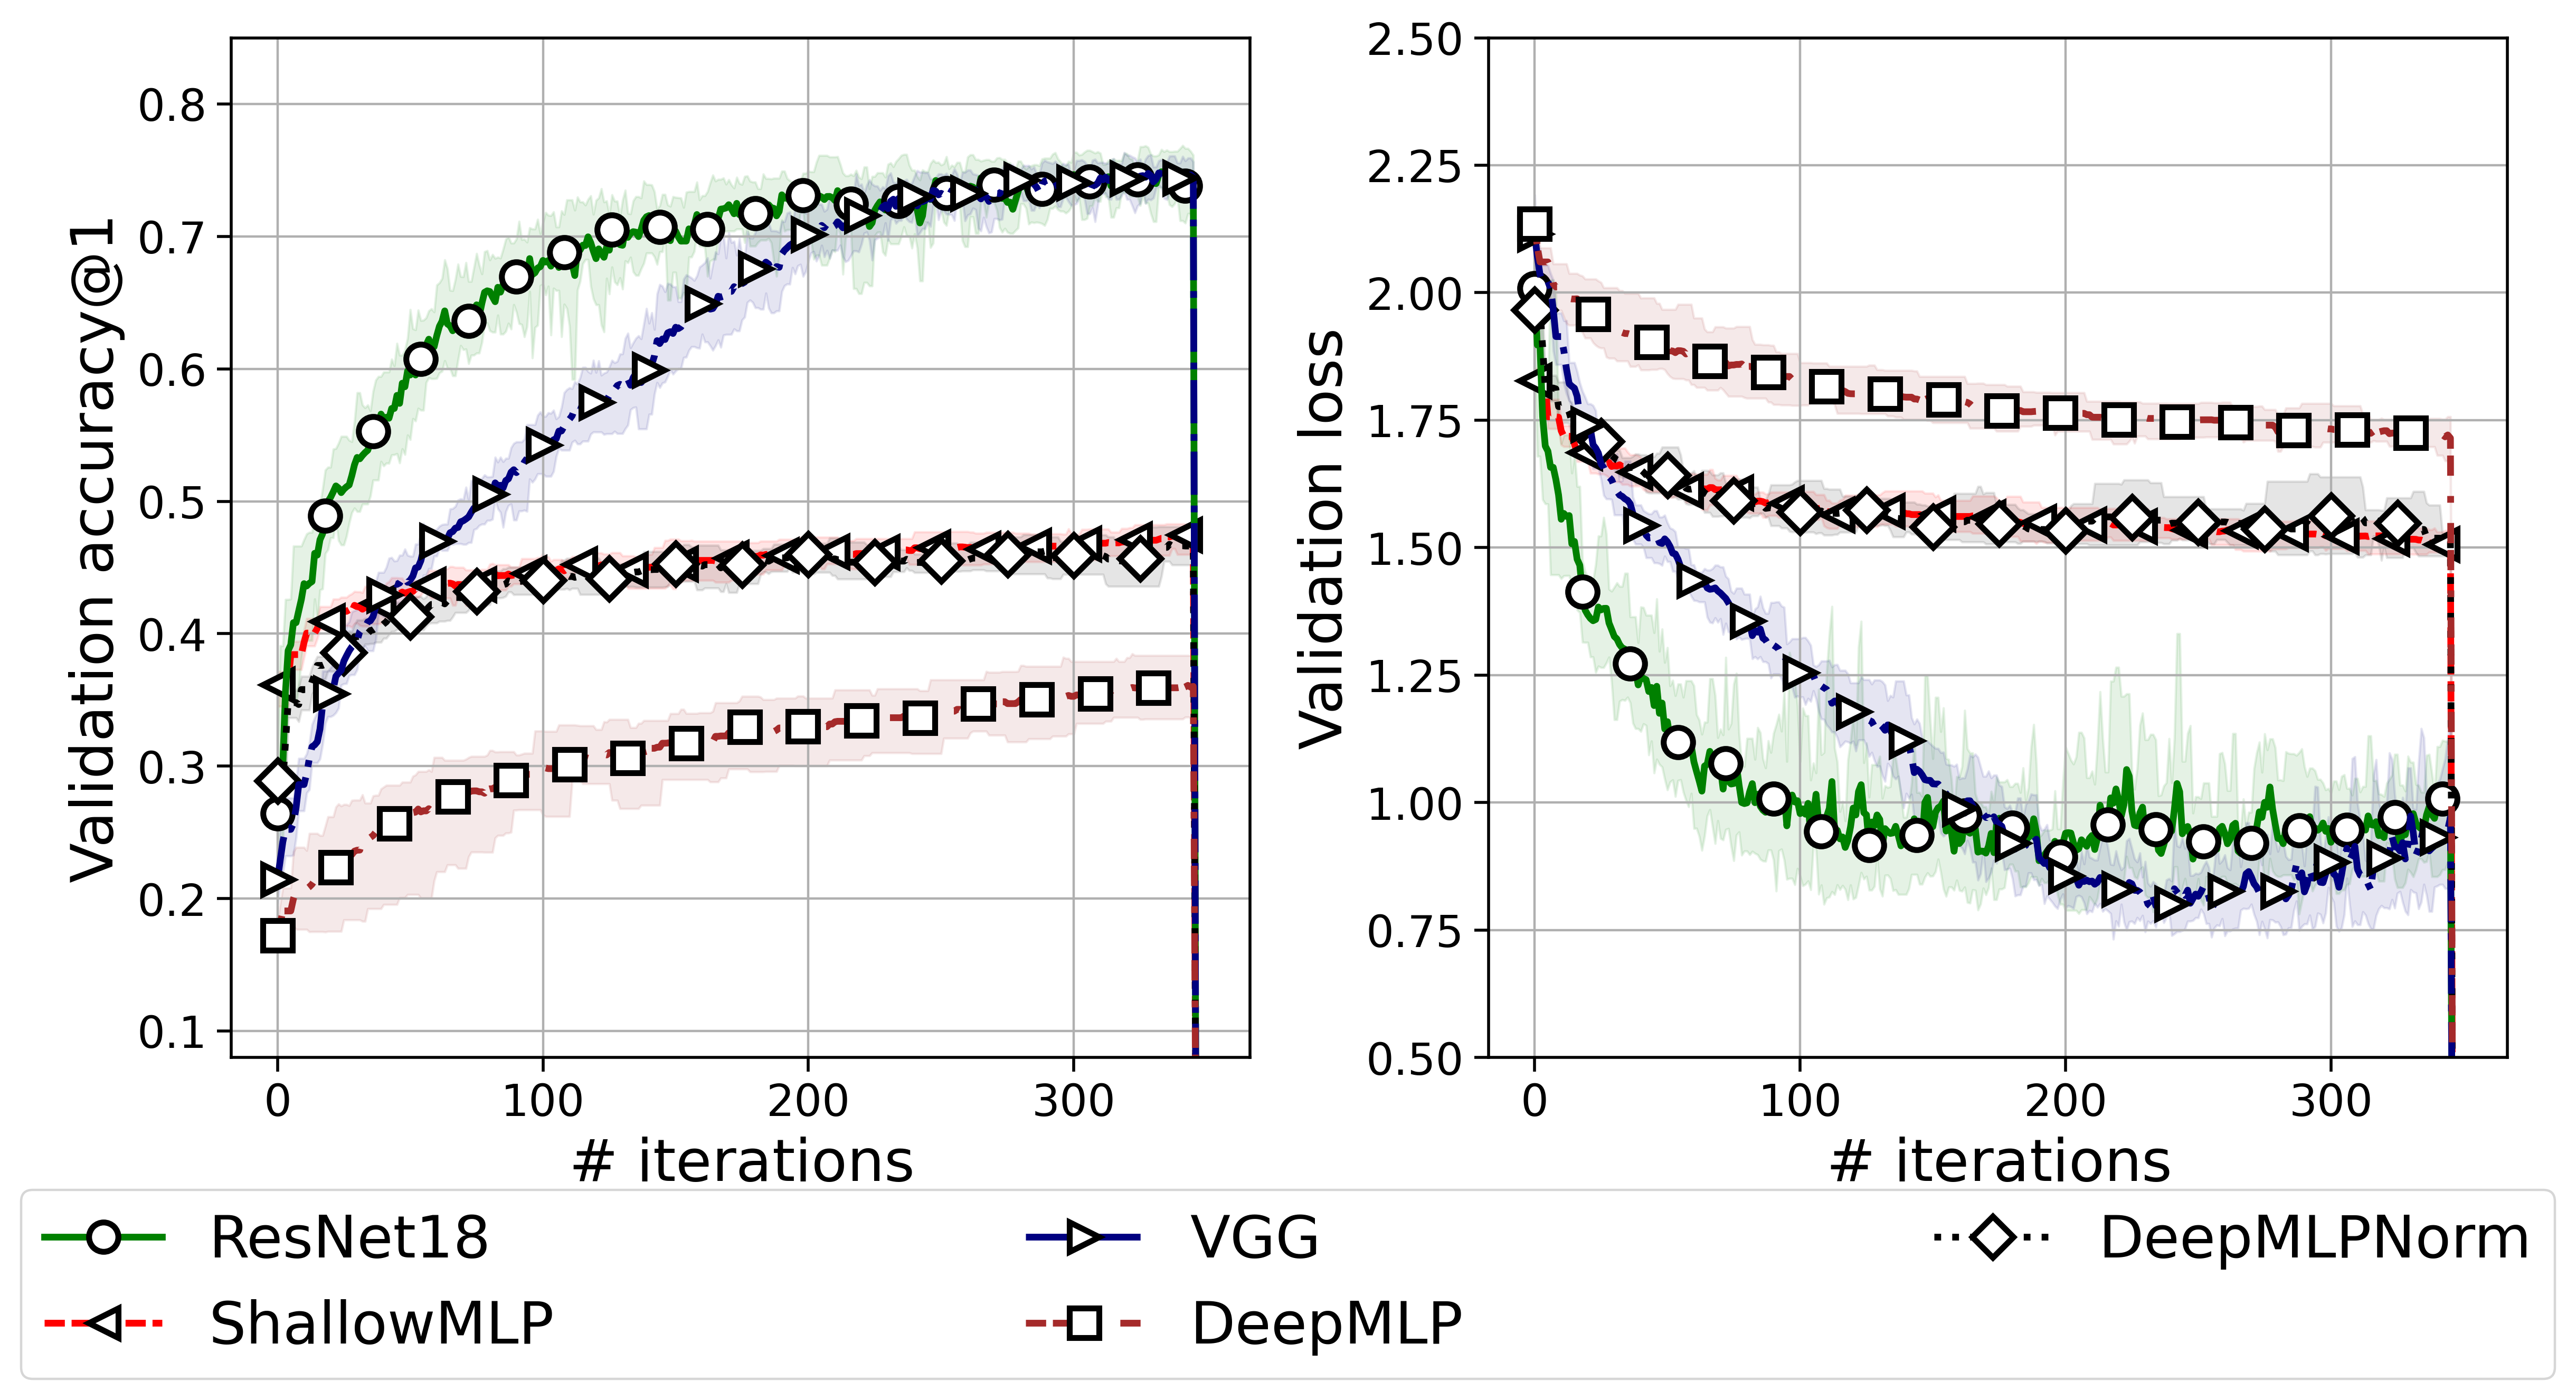

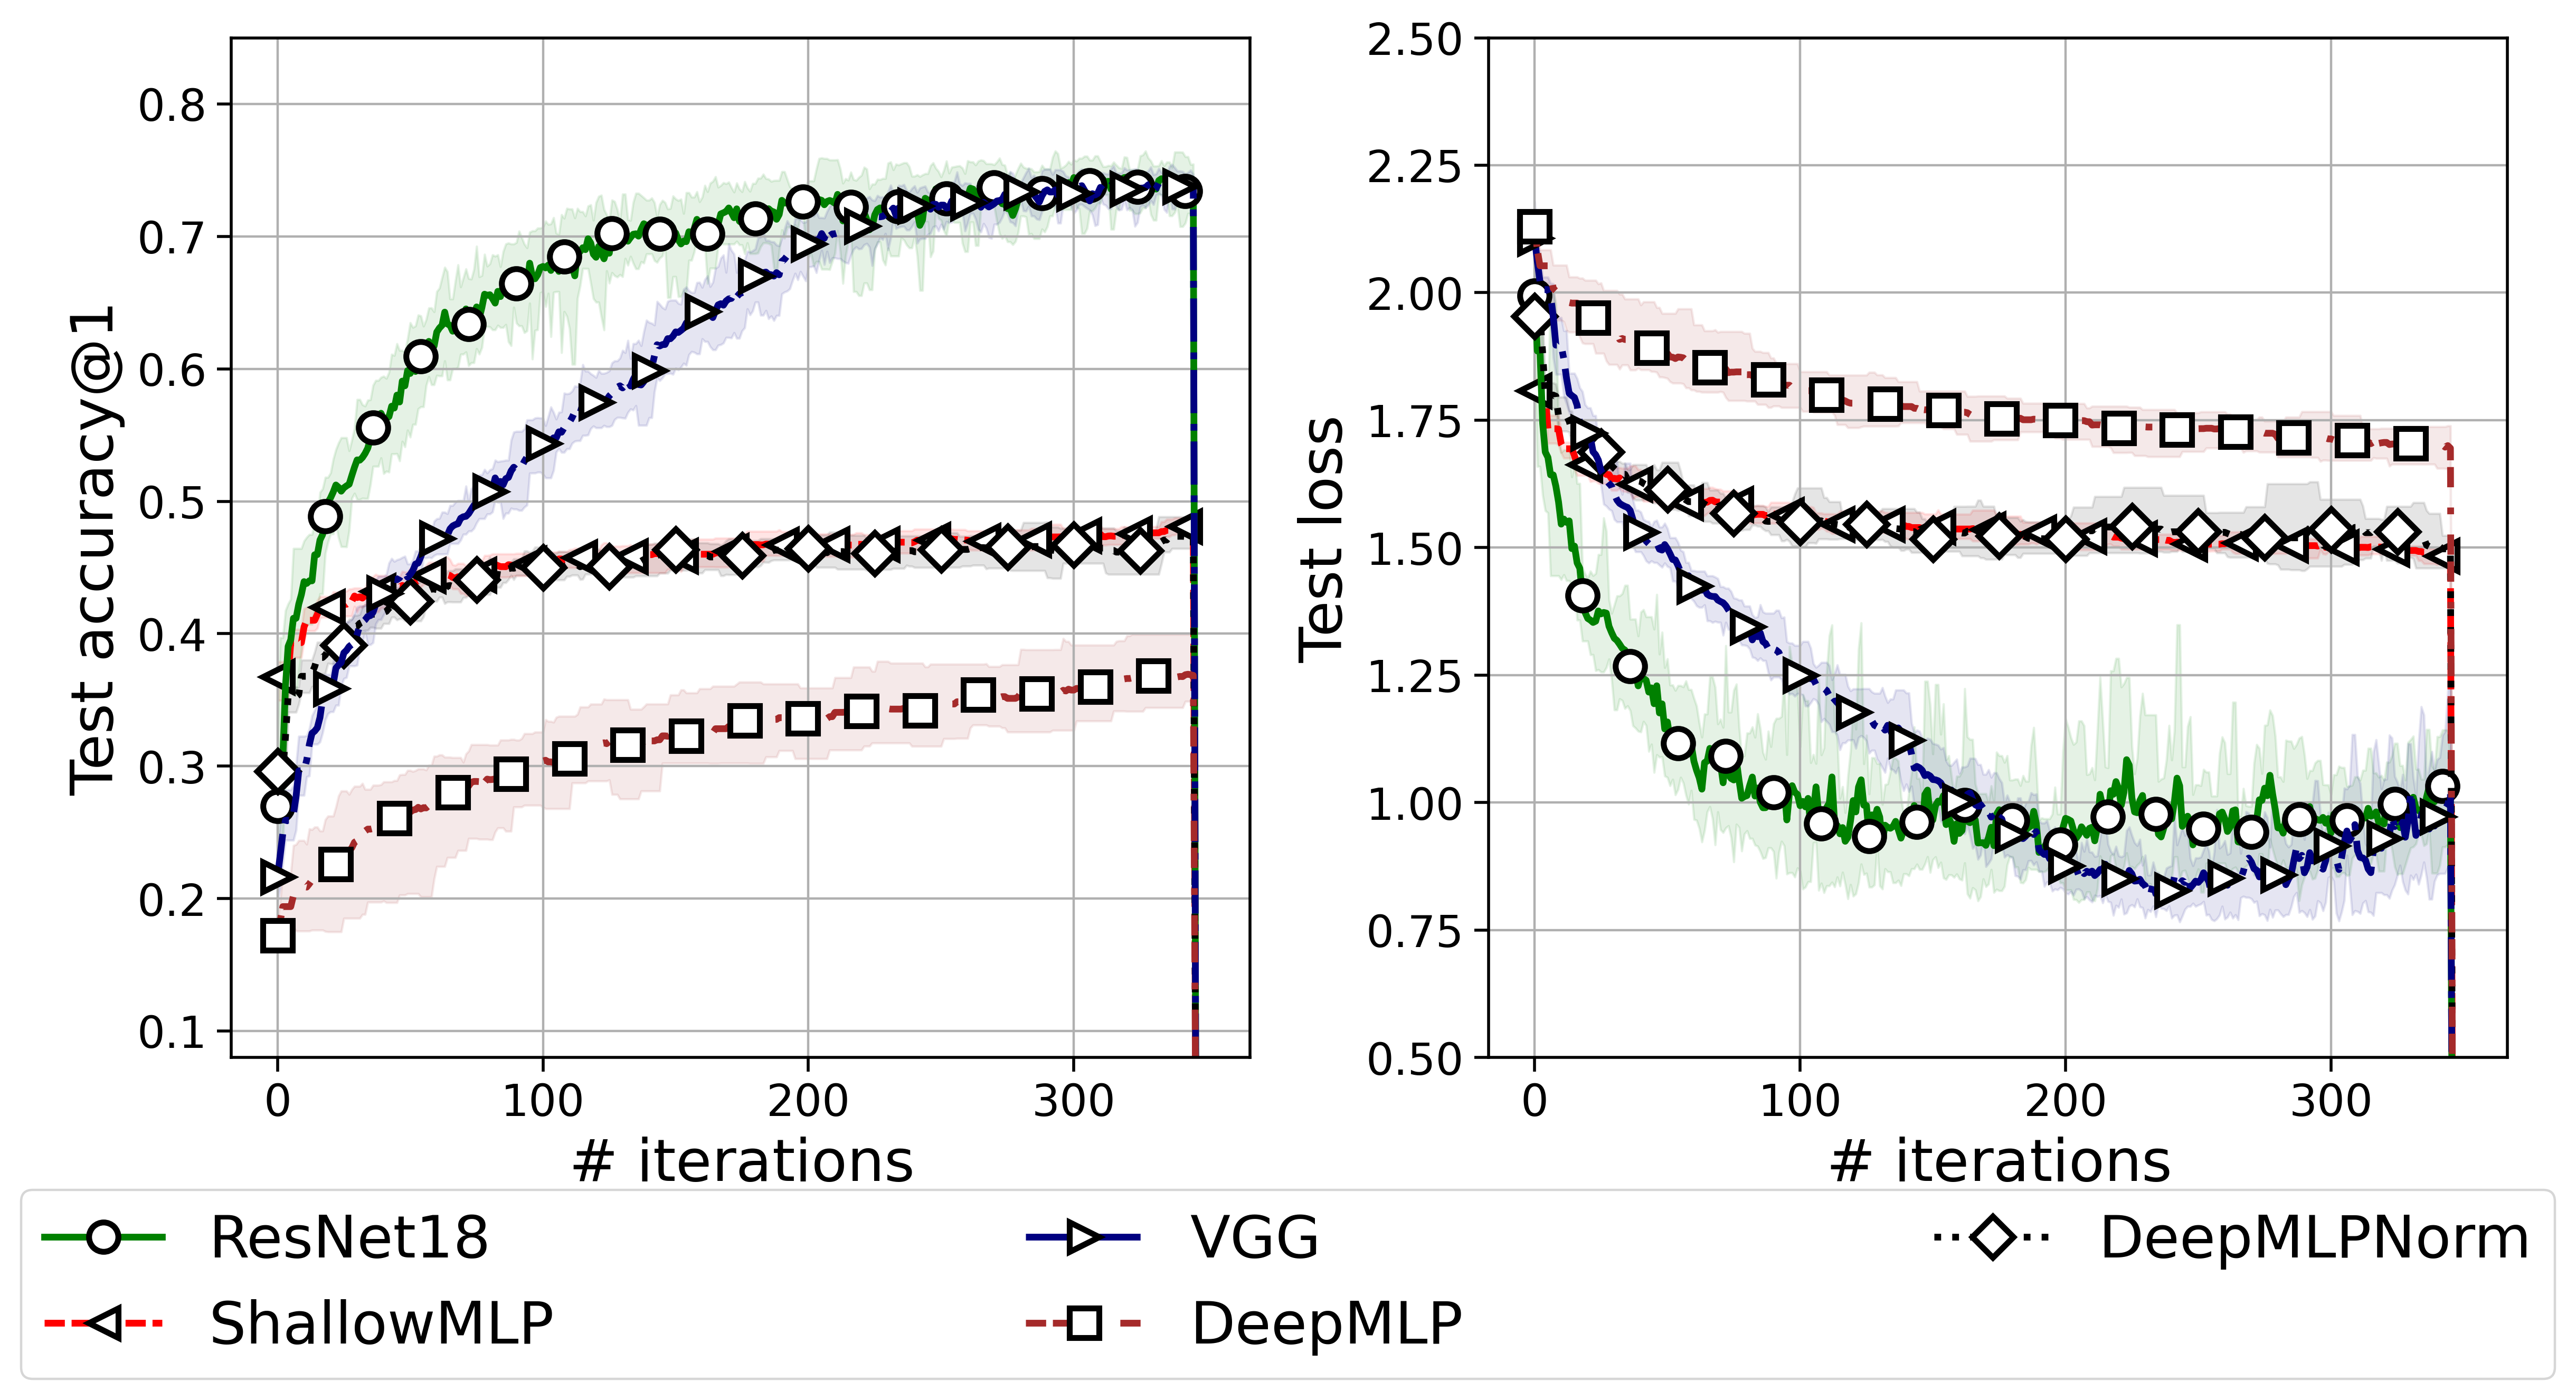

In [ ]:

fig, ax, _ = get_fig_set_style(7, shape=(1,2), figsize=(12,6))
ax[1].grid()
plot_vals(ax[0], get_loss_hist("pull_rew.eval_rez.accuracy"), "Validation accuracy@1", (0.08, 0.85))
plot_vals(ax[1], get_loss_hist("pull_rew.eval_rez.loss"), " Validation loss", (0.5, 2.5))
h, legend_ = ax[0].get_legend_handles_labels()

pos = [1, 0, 3, 4, 2]
print(legend_)
legend_, h = [legend_[p] for p in pos], [h[p] for p in pos]
fig.legend(
    h,
    legend_,
    ncol=3,
    bbox_to_anchor=(0.0, -0.06, 1, 0.10),
    loc="outside upper left",
    mode="expand",
    borderaxespad=0,
)


fig.tight_layout()
# fig = fig.subplots_adjust(bottom=0.1)
figs = {"both": fig}

fig, ax, _ = get_fig_set_style(7, shape=(1,2), figsize=(12,6))
ax[1].grid()
plot_vals(ax[0], get_loss_hist('test_rew.accuracy',), "Test accuracy@1", (0.08, 0.85))
plot_vals(ax[1], get_loss_hist('test_rew.loss',), " Test loss", (0.5, 2.5))
h, legend_ = ax[0].get_legend_handles_labels()

pos = [1, 0, 3, 4, 2]
print(legend_)
legend_, h = [legend_[p] for p in pos], [h[p] for p in pos]
fig.legend(
    h,
    legend_,
    ncol=3,
    bbox_to_anchor=(0.0, -0.06, 1, 0.10),
    loc="outside upper left",
    mode="expand",
    borderaxespad=0,
)

fig.tight_layout()
# fig = fig.subplots_adjust(bottom=0.1)
figs = {"test_both": fig}
# ax.grid()


# figs = {}
# figs["acc"] = plot_vals(get_loss_hist("accuracy"), "Accuracy", (0.2, 1.))
# figs["loss"] = plot_vals(get_loss_hist("loss"), "Loss", (0.5, 2.1))